In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading data from MNIST dataset
df = pd.read_csv('/content/drive/MyDrive/Data/MNIST_real.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Transform to numpy array
y = df['784'].values
x = df.drop(columns='784').values
print(y)
print(x[13,73])

[5 0 4 ... 4 5 6]
222


In [ ]:
#Scaling data
x = x / 255
x[13, 73]

0.8705882352941177

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 10000, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [ ]:
# Calculate the accuracy of model when weight = uniform
import sklearn

acc_uni = []
for i in range(1, 21):
    print("Running on {} Neighbors".format(i))
    knn_uni = KNeighborsClassifier(n_neighbors = i, weights='uniform')
    knn_uni.fit(x_train, y_train)
    acc = (knn_uni.score(x_test[1:5000], y_test[1:5000]))
    print(acc)
    acc_uni.append(acc)

Running on 1 Neighbors
0.9725945189037808
Running on 2 Neighbors
0.961992398479696
Running on 3 Neighbors
0.9705941188237648
Running on 4 Neighbors
0.9691938387677536
Running on 5 Neighbors
0.9695939187837568
Running on 6 Neighbors
0.9683936787357471
Running on 7 Neighbors
0.968993798759752
Running on 8 Neighbors
0.9661932386477295
Running on 9 Neighbors
0.9667933586717343
Running on 10 Neighbors
0.9651930386077215
Running on 11 Neighbors
0.96499299859972
Running on 12 Neighbors
0.9637927585517103
Running on 13 Neighbors
0.963992798559712
Running on 14 Neighbors
0.9621924384876975
Running on 15 Neighbors
0.963992798559712
Running on 16 Neighbors
0.9625925185037008
Running on 17 Neighbors
0.9633926785357071
Running on 18 Neighbors
0.9617923584716943
Running on 19 Neighbors
0.9613922784556911
Running on 20 Neighbors
0.9615923184636928


In [ ]:
# Calculate the accuracy of model when weight = distance
acc = []
for i in range(1, 21):
    print("Running on {} Neighbors".format(i))
    knn = KNeighborsClassifier(n_neighbors = i, weights='distance')
    knn.fit(x_train, y_train)
    acc.append(knn.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors
Running on 11 Neighbors
Running on 12 Neighbors
Running on 13 Neighbors
Running on 14 Neighbors
Running on 15 Neighbors
Running on 16 Neighbors
Running on 17 Neighbors
Running on 18 Neighbors
Running on 19 Neighbors
Running on 20 Neighbors


<function matplotlib.pyplot.show(close=None, block=None)>

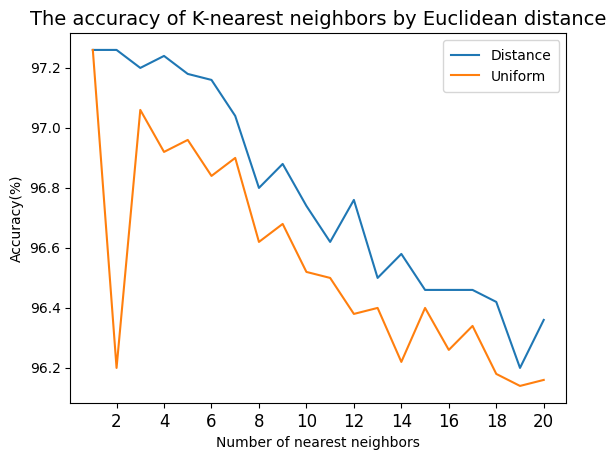

In [ ]:
# Comparing the accuracy between 2 ways to choose weight
dis_func = plt.plot(np.arange(1, 21), np.array(acc)*100)
uni_func = plt.plot(np.arange(1, 21), np.array(acc_uni)*100)

plt.legend([dis_func[0], uni_func[0]], ['Distance', 'Uniform'], loc='best', borderpad = 0.6)

plt.xlabel("Number of nearest neighbors")
plt.ylabel('Accuracy(%)')
plt.xticks(ticks=np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]), fontsize=12)
plt.title("The accuracy of K-nearest neighbors by Euclidean distance", fontsize=14)
plt.show

In [ ]:
# Self-created heuristic function with sigma square = 2.5
def gauss_1(distance):
    sigma_square = 2.5
    return np.exp(-(distance**2) / sigma_square)

acc_1 = []
for i in range(1, 21):
    print("Running on {} Neighbors".format(i))
    knn_1 = KNeighborsClassifier(n_neighbors = i, weights = gauss_1)
    knn_1.fit(x_train, y_train)
    acc_1.append(knn_1.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors
Running on 11 Neighbors
Running on 12 Neighbors
Running on 13 Neighbors
Running on 14 Neighbors
Running on 15 Neighbors
Running on 16 Neighbors
Running on 17 Neighbors
Running on 18 Neighbors
Running on 19 Neighbors
Running on 20 Neighbors


In [ ]:
# Self-created heuristic function with sigma square = 3
def gauss_2(distance):
    sigma_square = 3
    return np.exp(-(distance**2) / sigma_square)

acc_2 = []
for i in range(1, 21):
    print("Running on {} Neighbors".format(i))
    knn_2 = KNeighborsClassifier(n_neighbors = i, weights = gauss_2)
    knn_2.fit(x_train, y_train)
    acc_2.append(knn_2.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors
Running on 11 Neighbors
Running on 12 Neighbors
Running on 13 Neighbors
Running on 14 Neighbors
Running on 15 Neighbors
Running on 16 Neighbors
Running on 17 Neighbors
Running on 18 Neighbors
Running on 19 Neighbors
Running on 20 Neighbors


In [ ]:
# Self-created heuristic function with sigma square = 3.5
def gauss_3(distance):
    sigma_square = 3.5
    return np.exp(-(distance**2) / sigma_square)

acc_3 = []
for i in range(1, 21):
    print("Running on {} Neighbors".format(i))
    knn_3 = KNeighborsClassifier(n_neighbors = i, weights = gauss_3)
    knn_3.fit(x_train, y_train)
    acc_3.append(knn_3.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors
Running on 11 Neighbors
Running on 12 Neighbors
Running on 13 Neighbors
Running on 14 Neighbors
Running on 15 Neighbors
Running on 16 Neighbors
Running on 17 Neighbors
Running on 18 Neighbors
Running on 19 Neighbors
Running on 20 Neighbors


In [ ]:
# Self-created heuristic function with sigma square = 4
def gauss_4(distance):
    sigma_square = 4
    return np.exp(-(distance**2) / sigma_square)

acc_4 = []
for i in range(1, 21):
    print("Running on {} Neighbors".format(i))
    knn_4 = KNeighborsClassifier(n_neighbors = i, weights = gauss_4)
    knn_4.fit(x_train, y_train)
    acc_4.append(knn_4.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors
Running on 11 Neighbors
Running on 12 Neighbors
Running on 13 Neighbors
Running on 14 Neighbors
Running on 15 Neighbors
Running on 16 Neighbors
Running on 17 Neighbors
Running on 18 Neighbors
Running on 19 Neighbors
Running on 20 Neighbors


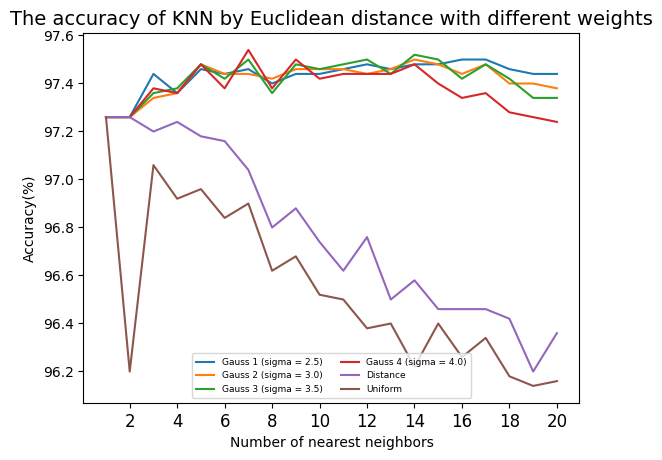

In [ ]:
my_func_1 = plt.plot(np.arange(1, 21), np.array(acc_1)*100)
my_func_2 = plt.plot(np.arange(1, 21), np.array(acc_2)*100)
my_func_3 = plt.plot(np.arange(1, 21), np.array(acc_3)*100)
my_func_4 = plt.plot(np.arange(1, 21), np.array(acc_4)*100)
default_func = plt.plot(np.arange(1, 21), np.array(acc)*100)
uni_func = plt.plot(np.arange(1, 21), np.array(acc_uni)*100)

plt.legend([my_func_1[0], my_func_2[0], my_func_3[0], my_func_4[0], default_func[0], uni_func[0]], \
           ['Gauss 1 (sigma = 2.5)', 'Gauss 2 (sigma = 3.0)', 'Gauss 3 (sigma = 3.5)', 'Gauss 4 (sigma = 4.0)', 'Distance', 'Uniform'], \
           loc='lower center',ncol = 2, borderpad = 0.5, fontsize=6.5)

plt.xlabel("Number of nearest neighbors")
plt.ylabel('Accuracy(%)')
plt.xticks(ticks=np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]), fontsize=12)
plt.title("The accuracy of KNN by Euclidean distance with different weights", fontsize=14)
plt.show()

In [ ]:
import random
i = np.random.randint(len(x_test))
x_random = x_test[i, : ].reshape(1, -1)
print(x_random.shape)
print(x_test.shape)
print(knn.predict(x_random))
print(y_test[i])

(1, 784)
(10000, 784)
[5]
5


In [ ]:
# Calculate the accuracy of the model by using Manhattan distance
acc_ma = []
for i in range(1, 11):
    print("Running on {} Neighbors".format(i))
    knn_ma = KNeighborsClassifier(n_neighbors = i, weights='distance', metric='manhattan')
    knn_ma.fit(x_train, y_train)
    acc_ma.append(knn_ma.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors


<function matplotlib.pyplot.show(close=None, block=None)>

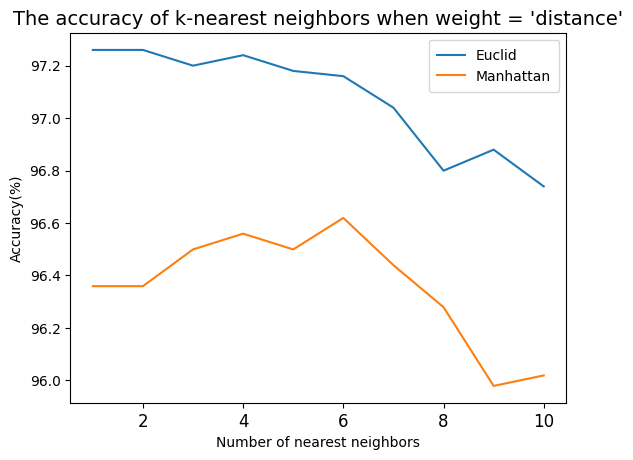

In [ ]:
# Compare the accuracy between Euclidean distance and Manhattan distance
euclid_func = plt.plot(np.arange(1, 11), np.array(acc[:10])*100)
man_func = plt.plot(np.arange(1, 11), np.array(acc_ma)*100)

plt.legend([euclid_func[0], man_func[0]], ['Euclid', 'Manhattan'], loc='best', borderpad = 0.6)

plt.xlabel("Number of nearest neighbors")
plt.ylabel('Accuracy(%)')
plt.xticks(ticks=np.array([2, 4, 6, 8, 10]), fontsize=12)
plt.title("The accuracy of k-nearest neighbors when weight = 'distance'", fontsize=14)
plt.show

In [ ]:
acc_ma_uni = []
for i in range(1, 11):
    print("Running on {} Neighbors".format(i))
    knn_ma_uni = KNeighborsClassifier(n_neighbors = i, weights='uniform', metric = 'manhattan')
    knn_ma_uni.fit(x_train, y_train)
    acc_ma_uni.append(knn_ma_uni.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors


In [ ]:
def manhattan_weight_1(distance):
    sigma_square = 10
    return np.exp(-(distance**2) / sigma_square)

acc_ma_1 = []
for i in range(1, 11):
    print("Running on {} Neighbors".format(i))
    knn_ma_1 = KNeighborsClassifier(n_neighbors = i, weights=manhattan_weight_1, metric='manhattan')
    knn_ma_1.fit(x_train, y_train)
    acc_ma_1.append(knn_ma_1.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors


In [ ]:
def manhattan_weight_2(distance):
    sigma_square = 20
    return np.exp(-(distance**2) / sigma_square)

acc_ma_2 = []
for i in range(1, 11):
    print("Running on {} Neighbors".format(i))
    knn_ma_2 = KNeighborsClassifier(n_neighbors = i, weights=manhattan_weight_2, metric='manhattan')
    knn_ma_2.fit(x_train, y_train)
    acc_ma_2.append(knn_ma_2.score(x_test[1:5000], y_test[1:5000]))

Running on 1 Neighbors
Running on 2 Neighbors
Running on 3 Neighbors
Running on 4 Neighbors
Running on 5 Neighbors
Running on 6 Neighbors
Running on 7 Neighbors
Running on 8 Neighbors
Running on 9 Neighbors
Running on 10 Neighbors


<function matplotlib.pyplot.show(close=None, block=None)>

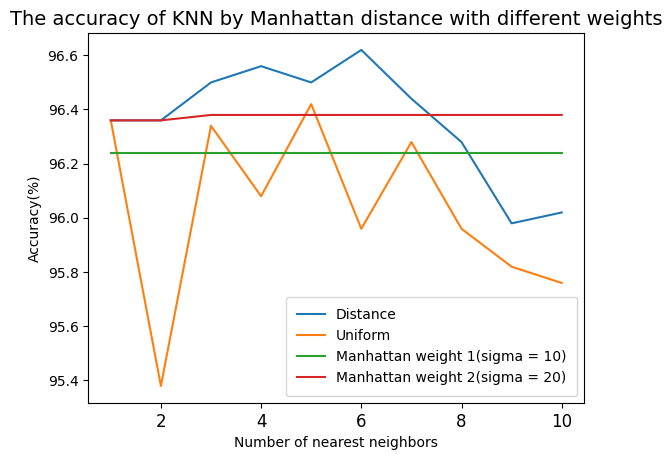

In [ ]:
manhattan_func = plt.plot(np.arange(1, 11), np.array(acc_ma)*100)
manhattan_func_uni = plt.plot(np.arange(1, 11), np.array(acc_ma_uni)*100)
manhattan_func_1 = plt.plot(np.arange(1, 11), np.array(acc_ma_1)*100)
manhattan_func_2 = plt.plot(np.arange(1, 11), np.array(acc_ma_2)*100)

plt.legend([manhattan_func[0], manhattan_func_uni[0], manhattan_func_1[0], manhattan_func_2[0]], \
           ['Distance', 'Uniform', 'Manhattan weight 1(sigma = 10)', 'Manhattan weight 2(sigma = 20)'], \
           loc='best', borderpad = 0.8)

plt.xlabel("Number of nearest neighbors")
plt.ylabel('Accuracy(%)')
plt.xticks(ticks=np.array([2, 4, 6, 8, 10]), fontsize=12)
plt.title("The accuracy of KNN by Manhattan distance with different weights", fontsize=14)
plt.show